In [75]:
#conda install -c conda-forge plotnine

In [76]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [77]:
df = pd.read_csv('sku_clustering.csv')
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
df

Dimension data: 9159 rows and 23 columns


,sku_ID,"('quantity', 'mean')","('quantity', 'sum')","('order_ID', 'nunique')","('order_hour', 'nunique')","('order_hour', 'group_mode')","('day_of_month', 'nunique')","('day_of_month', 'group_mode')","('original_unit_price', 'mean')","('discount_rate', 'mean')",...,"('gift_item', 'mean')","('dc_ori', 'nunique')","('dc_ori', 'group_mode')","('dc_des', 'nunique')","('dc_des', 'group_mode')","('promise', 'group_mode')","('type', 'group_mode')",brand_ID,attribute1,attribute2
0,000aa92b82,1.167,14,12,7,"(20.0, 22.0]",10,11,83.333,0.013,...,0.000,6,2,9,4,-,2,9d3465eacc,4.0,100.0
1,000d4af39d,1.000,1,1,1,"(8.0, 10.0]",1,12,159.000,0.509,...,0.000,1,9,1,9,-,2,42e6445fca,4.0,100.0
2,000dc27e13,1.000,1,1,1,"(13.0, 15.0]",1,12,116.000,0.207,...,0.000,1,5,1,5,-,2,4f65703579,3.0,100.0
3,000e84e3a7,1.000,1,1,1,"(0.0, 8.0]",1,19,75.000,0.000,...,0.000,1,9,1,9,-,2,137b63c785,3.0,100.0
4,00104dbcd7,1.072,89,83,10,"(18.0, 20.0]",26,14,79.000,0.260,...,0.000,7,5,36,4,2,2,5a0b271e15,2.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,fff33f1633,1.500,3,2,2,"(10.0, 11.0]",2,11,109.000,0.092,...,0.000,1,5,2,16,-,2,603dc9ab6b,3.0,100.0
9155,fff4328ec0,1.000,1,1,1,"(16.0, 18.0]",1,10,109.000,0.000,...,0.000,1,10,1,10,-,2,bd97f9a5fa,4.0,100.0
9156,fff84ed7ec,1.231,16,13,7,"(13.0, 15.0]",4,30,69.000,0.003,...,0.000,6,5,8,5,1,1,ab56426464,1.0,-
9157,fffe1bd280,1.207,588,486,10,"(20.0, 22.0]",29,8,68.051,0.391,...,0.000,25,2,40,2,1,1,adbd559b78,3.0,70.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9159 entries, 0 to 9158
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   sku_ID                              9159 non-null   object 
 1   ('quantity', 'mean')                9159 non-null   float64
 2   ('quantity', 'sum')                 9159 non-null   int64  
 3   ('order_ID', 'nunique')             9159 non-null   int64  
 4   ('order_hour', 'nunique')           9159 non-null   int64  
 5   ('order_hour', 'group_mode')        9159 non-null   object 
 6   ('day_of_month', 'nunique')         9159 non-null   int64  
 7   ('day_of_month', 'group_mode')      9159 non-null   int64  
 8   ('original_unit_price', 'mean')     9159 non-null   float64
 9   ('discount_rate', 'mean')           9159 non-null   float64
 10  ('direct_discount_rate', 'mean')    8814 non-null   float64
 11  ('quantity_discount_rate', 'mean')  8809 no

In [79]:
df.nunique()

sku_ID                                9159
('quantity', 'mean')                   963
('quantity', 'sum')                    575
('order_ID', 'nunique')                520
('order_hour', 'nunique')               11
('order_hour', 'group_mode')            10
('day_of_month', 'nunique')             31
('day_of_month', 'group_mode')          31
('original_unit_price', 'mean')       1324
('discount_rate', 'mean')             4710
('direct_discount_rate', 'mean')      2456
('quantity_discount_rate', 'mean')    2036
('bundle_discount_rate', 'mean')        88
('gift_item', 'mean')                  123
('dc_ori', 'nunique')                   49
('dc_ori', 'group_mode')                18
('dc_des', 'nunique')                   60
('dc_des', 'group_mode')                60
('promise', 'group_mode')                9
('type', 'group_mode')                   2
brand_ID                              1063
attribute1                               5
attribute2                               9
dtype: int6

In [80]:
# drop sku_ID because all unique values
df.drop('sku_ID', axis = 1, inplace = True)

# identify categorical variables
cat = df.columns[[4,6,14,16,17,18,19,20,21]]

# change data type for categorical variables
df[cat] = df[cat].astype('object')

In [81]:
df.select_dtypes('object').nunique()

('order_hour', 'group_mode')        10
('day_of_month', 'group_mode')      31
('dc_ori', 'group_mode')            18
('dc_des', 'group_mode')            60
('promise', 'group_mode')            9
('type', 'group_mode')               2
brand_ID                          1063
attribute1                           5
attribute2                           9
dtype: int64

In [82]:
# Summary statistics of numerical variable
df.describe()

,"('quantity', 'mean')","('quantity', 'sum')","('order_ID', 'nunique')","('order_hour', 'nunique')","('day_of_month', 'nunique')","('original_unit_price', 'mean')","('discount_rate', 'mean')","('direct_discount_rate', 'mean')","('quantity_discount_rate', 'mean')","('bundle_discount_rate', 'mean')","('gift_item', 'mean')","('dc_ori', 'nunique')","('dc_des', 'nunique')"
count,9159.000,9159.000,9159.000,9159.000,9159.000,9159.000,9159.000,8814.000,8809.000,8814.000,9159.000,9159.000,9159.000
mean,1.139,73.060,59.078,3.938,6.426,142.755,0.189,0.104,inf,0.001,0.049,3.640,8.650
std,1.638,565.733,452.052,3.263,7.995,316.116,0.263,0.176,NaN,0.014,0.211,4.470,13.072
min,1.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
25%,1.000,1.000,1.000,1.000,1.000,68.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
50%,1.000,3.000,3.000,3.000,3.000,100.000,0.048,0.000,0.000,0.000,0.000,2.000,3.000
75%,1.056,13.000,12.000,6.000,8.000,169.000,0.309,0.159,0.005,0.000,0.000,5.000,9.000
max,101.000,25769.000,23625.000,10.000,31.000,12158.000,1.000,0.915,inf,0.912,1.000,50.000,60.000


## Check and impute missing value

In [83]:
# Check missing value
df.isna().sum()

('quantity', 'mean')                    0
('quantity', 'sum')                     0
('order_ID', 'nunique')                 0
('order_hour', 'nunique')               0
('order_hour', 'group_mode')            0
('day_of_month', 'nunique')             0
('day_of_month', 'group_mode')          0
('original_unit_price', 'mean')         0
('discount_rate', 'mean')               0
('direct_discount_rate', 'mean')      345
('quantity_discount_rate', 'mean')    350
('bundle_discount_rate', 'mean')      345
('gift_item', 'mean')                   0
('dc_ori', 'nunique')                   0
('dc_ori', 'group_mode')                0
('dc_des', 'nunique')                   0
('dc_des', 'group_mode')                0
('promise', 'group_mode')               0
('type', 'group_mode')                  0
brand_ID                              327
attribute1                            327
attribute2                            327
dtype: int64

In [84]:
# impute missing value for categorical data using '-'
df['attribute1'] = df['attribute1'].fillna('-')
df['attribute2'] = df['attribute2'].fillna('-')
df['brand_ID'] = df['brand_ID'].fillna('-')

In [85]:
df['attribute1'].value_counts()

3.0    3178
-      3044
4.0    1612
2.0    1045
1.0     280
Name: attribute1, dtype: int64

In [86]:
df['attribute2'].value_counts()

-        3543
100.0    3014
60.0     1668
50.0      291
70.0      258
40.0      130
80.0      127
30.0       66
90.0       62
Name: attribute2, dtype: int64

In [87]:
#Replace NaN and Inf with 0 value for numerical, since all of them are under gift items's other discount
df.fillna(value=0, inplace=True)
df.replace(np.Inf, 0, inplace=True)

In [88]:
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9159 entries, 0 to 9158
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ('order_hour', 'group_mode')    9159 non-null   object
 1   ('day_of_month', 'group_mode')  9159 non-null   int64 
 2   ('dc_ori', 'group_mode')        9159 non-null   int64 
 3   ('dc_des', 'group_mode')        9159 non-null   int64 
 4   ('promise', 'group_mode')       9159 non-null   object
 5   ('type', 'group_mode')          9159 non-null   int64 
 6   brand_ID                        9159 non-null   object
 7   attribute1                      9159 non-null   object
 8   attribute2                      9159 non-null   object
dtypes: int64(4), object(5)
memory usage: 644.1+ KB


In [89]:
df[cat] = df[cat].astype('object') # change data type for categorical feature again

In [90]:
# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ["('order_hour', 'group_mode')", "('day_of_month', 'group_mode')", "('dc_ori', 'group_mode')", "('dc_des', 'group_mode')", "('promise', 'group_mode')", "('type', 'group_mode')", 'brand_ID', 'attribute1', 'attribute2']
Categorical columns position  : [4, 6, 14, 16, 17, 18, 19, 20, 21]


In [99]:
# feature scaling for numerical features
num = df.drop(cat, axis = 1).columns

from sklearn.preprocessing import StandardScaler
scaled_num = StandardScaler().fit_transform(df[num])
df[num] = scaled_num

In [100]:
df.head()

,"('quantity', 'mean')","('quantity', 'sum')","('order_ID', 'nunique')","('order_hour', 'nunique')","('order_hour', 'group_mode')","('day_of_month', 'nunique')","('day_of_month', 'group_mode')","('original_unit_price', 'mean')","('discount_rate', 'mean')","('direct_discount_rate', 'mean')",...,"('gift_item', 'mean')","('dc_ori', 'nunique')","('dc_ori', 'group_mode')","('dc_des', 'nunique')","('dc_des', 'group_mode')","('promise', 'group_mode')","('type', 'group_mode')",brand_ID,attribute1,attribute2
0,0.017,-0.104,-0.104,0.938,"(20.0, 22.0]",0.447,11,-0.188,-0.671,-0.574,...,-0.230,0.528,2,0.027,4,-,2,9d3465eacc,4.0,100.0
1,-0.085,-0.127,-0.128,-0.901,"(8.0, 10.0]",-0.679,12,0.051,1.217,2.360,...,-0.230,-0.591,9,-0.585,9,-,2,42e6445fca,4.0,100.0
2,-0.085,-0.127,-0.128,-0.901,"(13.0, 15.0]",-0.679,12,-0.085,0.067,0.618,...,-0.230,-0.591,5,-0.585,5,-,2,4f65703579,3.0,100.0
3,-0.085,-0.127,-0.128,-0.901,"(0.0, 8.0]",-0.679,19,-0.214,-0.720,-0.574,...,-0.230,-0.591,9,-0.585,9,-,2,137b63c785,3.0,100.0
4,-0.041,0.028,0.053,1.858,"(18.0, 20.0]",2.449,14,-0.202,0.269,0.884,...,-0.230,0.752,5,2.092,4,2,2,5a0b271e15,2.0,100.0


In [102]:
# Convert dataframe to matrix
# drop(["('order_hour', 'group_mode')","('promise', 'group_mode')"], axis = 1)
# list(df.select_dtypes('object').columns)
dfMatrix = df.to_numpy()
dfMatrix

array([[0.0166134904570432, -0.10440088221323188, -0.10414920585303464,
        ..., '9d3465eacc', '4.0', '100.0'],
       [-0.08513501444716746, -0.1273811621436532, -0.12848401960216468,
        ..., '42e6445fca', '4.0', '100.0'],
       [-0.08513501444716746, -0.1273811621436532, -0.12848401960216468,
        ..., '4f65703579', '3.0', '100.0'],
       ...,
       [0.055747530804816516, -0.1008654545316286, -0.10193695005765918,
        ..., 'ab56426464', '1.0', '-'],
       [0.041476061470597646, 0.91026686240691, 0.9444600411549331, ...,
        'adbd559b78', '3.0', '70.0'],
       [-0.08513501444716746, -0.11500716525804172, -0.11299822903453648,
        ..., '042c8894a9', '3.0', '100.0']], dtype=object)

In [103]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 1000):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'random', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except Exception as inst:
        print(inst)
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15
Cluster initiation: 16
Cluster initiation: 17
Cluster initiation: 18
Cluster initiation: 19
Cluster initiation: 20
Cluster initiation: 21
Clustering algorithm could not initialize. Consider assigning the initial clusters manually.


In [104]:
cost

[145324.9999999997,
 119588.07989249655,
 107954.35726096465,
 96555.69109578383,
 88515.9721497429,
 81238.45565787495,
 75237.9135614697,
 70235.30458590187,
 62733.147030720786,
 59318.601829249674,
 57674.96578285994,
 52055.090250321664,
 50606.900027400596,
 49342.54775598006,
 48041.343427473694,
 46645.300310099905,
 45940.07580673181,
 44796.41048391689,
 42919.67529394471,
 42534.39742788727,
 41721.603500024554]

cluster 1-21 cost:
[145324.9999999997,
 119588.07989249655,
 107954.35726096465,
 96555.69109578383,
 88515.9721497429,
 81238.45565787495,
 75237.9135614697,
 70235.30458590187,
 62733.147030720786,
 59318.601829249674,
 57674.96578285994,
 52055.090250321664,
 50606.900027400596,
 49342.54775598006,
 48041.343427473694,
 46645.300310099905,
 45940.07580673181,
 44796.41048391689,
 42919.67529394471,
 42534.39742788727,
 41721.603500024554]

In [298]:
np.array(range(1, 6))

array([1, 2, 3, 4, 5])

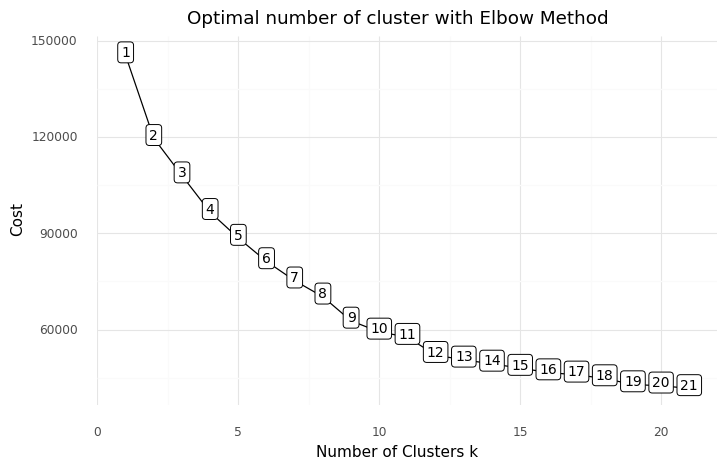

<ggplot: (316433324)>

In [105]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 22), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [106]:
# Fit the cluster
kprototype4 = KPrototypes(n_jobs = -1, n_clusters = 12, init = 'random', random_state = 0)
kprototype4.fit_predict(dfMatrix, categorical = catColumnsPos)

array([ 0,  4, 11, ...,  0,  2, 10], dtype=uint16)

In [107]:
# Cluster centroid
kprototype4.cluster_centroids_

array([['-0.02806848769792128', '-0.09956518319612957',
        '-0.09689590816327785', '0.8574317745278659',
        '0.4145887711953931', '-0.07121676951010517',
        '-0.43202657721301035', '-0.3598869616222864',
        '-0.16493679599819333', '-0.0025071905619895862',
        '-0.22383434062291835', '0.37287358900303563',
        '0.14085639767399052', '(8.0, 10.0]', '1', '5', '9', '-', '2',
        'bd97f9a5fa', '3.0', '100.0'],
       ['0.04153926139067502', '2.451208270488567', '1.5528303848831857',
        '0.7633333762206472', '0.5364844701370273',
        '-0.17215024310830082', '1.294088147493511',
        '-0.4178893912339999', '-0.2744127731753841',
        '30.289367002981027', '0.9561961857876377', '1.9983118656170957',
        '1.4038780841944196', '(8.0, 10.0]', '23', '5', '5', '-', '2',
        '-', '-', '100.0'],
       ['0.08300024137742283', '3.7454247290963396',
        '3.6736538763033852', '1.8580270149024045', '2.5646820148232456',
        '-0.1243521854897

In [112]:
# Check the cost of the clusters created
kprototype4.cost_

52055.090250321664

In [113]:
# Add the cluster to the dataframe
df['cluster_id'] = kprototype4.labels_ 

In [115]:
def show_sku_in_cluster(n):
    # n = number of clusters created
    for i in range(n):
        print('Number of skus in cluster {} = {}'.format(i, sum(df['cluster_id']==i)))
        
show_sku_in_cluster(12)

Number of skus in cluster 0 = 1403
Number of skus in cluster 1 = 7
Number of skus in cluster 2 = 97
Number of skus in cluster 3 = 429
Number of skus in cluster 4 = 1231
Number of skus in cluster 5 = 11
Number of skus in cluster 6 = 615
Number of skus in cluster 7 = 429
Number of skus in cluster 8 = 10
Number of skus in cluster 9 = 2
Number of skus in cluster 10 = 404
Number of skus in cluster 11 = 4521
